In [1170]:
library(readxl)
library(xlsx)
library(stringr)
library(ggplot2)
library(MASS)
library(edfun)
library(olsrr)
library(ggthemes)
library(data.table)
library(VennDiagram)
library(pheatmap)
library(stringr)
library(readxl)
library(MASS)
library(quantreg)
library(olsrr)
library(limma)
library(BiocManager)
library(randomForest)
library(nnet)
library(energy)
library(car)
library(foreign)
library(plyr)
library(ggplot2)
library(gridExtra)
library(cowplot)
library(DescTools)
library(ggpubr)
library(ROCR)
library(gdata)
library(scales)
library(variancePartition)

In [741]:
color_AD <- "#FF3300"
color_ND <- "blue"
color_CHC_H <- color_ND
color_CHC_M <- "#FFCC00"
color_CHC_L <- "#FF3300"
font_size <- 12
font_size_add <- 2

circle_size_1 <- 2
circle_size_2 <- 3

In [742]:
setwd("~/ownCloud/Meng/")

In [743]:
load(file = "R_workstation/100_plus_proteomic_DATA/protein_intensity_combat.Rdata")

In [744]:
pathology_data <- read_excel("100_plus_project/Metadata/Ganz_Zhang_Supplementary Tables_FINAL.xlsx", 
                       sheet=2, col_names=TRUE, na="NA")

In [745]:
pathology_data

nbb,GROUP,sex,age,pmd,ph,Brain weight [g],APOE,CDR,Reisberg,⋯,Atherosclerosis (0=none/1=slight/2=moderate/3=severe),Amyloid (A from ABC score Hyman 2012),Braak&Braak stage NFTs,Neuritic plaques (CERAD),Lewy bodies (Braak staging),Hip sclerosis (absent=0; present=1),Infarcts (absent=0; present=1),CAA (Thal Stage),"TDP-43 Centenarians (Nelson et al., 2023)",TDP-43 positivity in the amygdala (0=none; 1=little; 2=many)
<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
777,ND,f,72,0.30555555555555552,NA,1205,NA,NA,NA,⋯,NA,0,0,0,0,0,0,NA,NA,NA
797,ND,m,59,0.33333333333333331,NA,1322,NA,NA,NA,⋯,NA,1,1,0,0,0,0,NA,NA,NA
859,ND,m,72,0.48958333333333331,NA,1355,NA,NA,NA,⋯,NA,0,NA,NA,0,0,1,NA,NA,NA
880,ND,m,77,0.47569444444444442,NA,1260,NA,NA,NA,⋯,NA,0,1,NA,0,0,0,NA,NA,NA
889,ND,f,79,0.22569444444444445,NA,1285,NA,NA,NA,⋯,NA,2,2,1,0,0,0,NA,NA,NA
1993-014,AD,f,70,02:25,6.5,861,E3/E3,nd,7,⋯,1,3,5,2,0,0,1,NA,NA,NA
1995-066,AD,f,84,04:40,6.28,1020,E3/E4,nd,7,⋯,NA,3,5,3,0,0,0,NA,NA,NA
1996-035,AD,f,90,04:11,6.62,950,E3/E3,nd,7,⋯,3,3,4,3,0,0,1,1,NA,NA
1997-015,AD,f,85,03:10,6.9,1044,E3/E4,nd,7,⋯,1,3,5,2,0,0,0,1,NA,2


In [746]:
load(file = "100_plus_project/Metadata/metadata_s190_particalCHCinfo_20240401.Rdata")

In [747]:
metadata

,nbb,autopsy,Mass-Spec filenames (1),Mass-Spec filenames (2),sex,age,weight,GROUP,pmd,braak,⋯,apoe,fBraak,cBraak,O_amyloid,apoe_OR,pmd_numeric,filnames,MMSE_LV,MMSE_LAST_AVAILABLE,Years_before_death_LV
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<fct>,<chr>,<dbl>,⋯,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
121,2016-020,S16/020,20190325_121_S16_020_CHC_011,NA,F,102,955,CHC,06:10,2,⋯,23,2,1,A,0.6,6.166667,20190325_121_S16_020_CHC_011,21.00,21.00,0.52
125,2016-044,S16/044,20190325_125_S16_044_CHC_007,NA,F,102,1015,CHC,05:17,3,⋯,33,3,2,C,1.0,5.283333,20190325_125_S16_044_CHC_007,26.44,26.44,0.71
127,2016-094,S16/094,20190325_127_S16_094_CHC_004,NA,F,104,1045,CHC,07:55,3,⋯,33,3,2,A,1.0,7.916667,20190325_127_S16_094_CHC_004,26.52,26.52,0.61
16,2004-011,04/037,20190325_16_04_037_AD_008,NA,F,84,1017,AD,05:55,5,⋯,33,5,3,C,1.0,5.916667,20190325_16_04_037_AD_008,NA,NA,NA
182,2010-101,S10/292,20190325_183_S10_292_AD_010,NA,M,64,1233,AD,04:35,6,⋯,32,6,3,C,0.6,4.583333,20190325_183_S10_292_AD_010,NA,NA,NA
193,2002-024,S02/055,20190325_194_S02_055_ND_005,NA,F,75,1153,ND,05:30,1,⋯,42,1,1,C,2.6,5.500000,20190325_194_S02_055_ND_005,NA,NA,NA
31,2001-081,01/184,20190325_31_01_184_AD_006,NA,F,93,1010,AD,05:05,5,⋯,33,5,3,C,1.0,5.083333,20190325_31_01_184_AD_006,NA,NA,NA
57,1997-091,S97/235,20190325_57_S97_235_AD_003,NA,F,85,1000,AD,02:00,5,⋯,43,5,3,C,3.2,2.000000,20190325_57_S97_235_AD_003,NA,NA,NA
77,2011-072,S11/072,20190325_77_S11_072_ND_012,NA,F,76,1072,ND,07:15,2,⋯,33,2,1,O,1.0,7.250000,20190325_77_S11_072_ND_012,NA,NA,NA


In [1163]:
NBB_to_ID <- read_excel("/Users/zhangmeng/Documents/Paper Poster rePort/100-plus proteomic data analysis/Submission to Nature Medicine/Everything for rebuttal/KEY_NBB brain ID proteomics.xlsx",
                        sheet = 1, col_names=TRUE, na="NA")

In [1165]:
NBB_to_ID$included <- "No"

In [1166]:
NBB_to_ID[which(NBB_to_ID$nbb %in% metadata$nbb), ]$included <- "Yes"

In [1173]:
write.xlsx(NBB_to_ID, file = "/Users/zhangmeng/Documents/Paper Poster rePort/100-plus proteomic data analysis/Submission to Nature Medicine/Everything for rebuttal/KEY_NBB brain ID proteomics_included_in_analysis.xlsx", 
           sheetName = "included in analysis", 
           col.names = TRUE, row.names = TRUE, append = FALSE, showNA = FALSE)

In [762]:
pathology_data_inpaper <- subset(pathology_data, nbb %in% metadata$nbb)

In [1177]:
table(pathology_data_inpaper$GROUP, pathology_data_inpaper$"Braak&Braak stage\r\nNFTs")

     
       0  1  2  3  4  5  6
  AD   0  0  0  0 20 43 25
  CEN  0  1  6 24 14  4  0
  ND   4 21 17  8  0  0  0

In [1175]:
save(pathology_data_inpaper, file = "100_plus_project/Metadata/pathology_data_inpaper_20240717.Rdata")

In [765]:
colnames(pathology_data_inpaper)

[1] "nbb"                                                         
 [2] "GROUP"                                                       
 [3] "sex"                                                         
 [4] "age"                                                         
 [5] "pmd"                                                         
 [6] "ph"                                                          
 [7] "Brain weight [g]"                                            
 [8] "APOE"                                                        
 [9] "CDR"                                                         
[10] "Reisberg"                                                    
[11] "Cause of death"                                              
[12] "chronic diseases"                                            
[13] "ABC (Hyman 2012)"                                            
[14] "Atrophy (0=none/1=slight/2=moderate/3=severe)"               
[15] "Atherosclerosis (0=none/1=slight/2=moderate/3=severe)"       
[16] "Amyloid (A from ABC score Hyman 2012)"                       
[17] "Braak&Braak stage\r\nNFTs"                                   
[18] "Neuritic plaques (CERAD)"                                    
[19] "Lewy bodies (Braak staging)"                                 
[20] "Hip sclerosis (absent=0; present=1)"                         
[21] "Infarcts (absent=0; present=1)"                              
[22] "CAA\r\n (Thal Stage)"                                        
[23] "TDP-43 Centenarians (Nelson et al., 2023)"                   
[24] "TDP-43 positivity in the amygdala (0=none; 1=little; 2=many)"

In [1157]:
pathology_df <- pathology_data_inpaper[c("nbb", "GROUP", "age",
                                         "CAA\r\n (Thal Stage)")]

In [1158]:
colnames(pathology_df) <- c("nbb", "GROUP", "age", "TDP")

In [1159]:
pathology_df$GROUP <- factor(pathology_df$GROUP, levels = c("AD", "ND", "CEN"))

In [1160]:
table(pathology_df$TDP)


  0   1   2 
 38 110  33 

In [1039]:
pathology_df$TDP <- factor(pathology_df$TDP, levels = c(0, 1, 2, 3, 4, 5, 6))

In [1040]:
min(pathology_df$age)
max(pathology_df$age)

[1] 50

[1] 111

In [1041]:
table(pathology_df$TDP)
table(pathology_df$GROUP)


  0   1   2   3   4   5   6 
173   5   2   3   2   1   1 


 AD  ND CEN 
 88  53  49 

In [1042]:
table(pathology_df$GROUP, pathology_df$TDP) %>% rowSums

AD  ND CEN 
 88  50  49

In [1043]:
age_interval <- seq(50, 100, 5)

In [1044]:
age_path_perc_df <- NULL
for(i in 1:(length(age_interval)-1)){
    age_range <- paste(age_interval[i], age_interval[i+1], sep = "-")
    ND_count <- table(subset(pathology_df, 
                             (GROUP == "ND") & (age>=age_interval[i]) & (age<age_interval[i+1]))$TDP) %>% as.data.frame()
    AD_count <- table(subset(pathology_df, 
                             (GROUP == "AD") & (age>=age_interval[i]) & (age<age_interval[i+1]))$TDP) %>% as.data.frame()

    #print(age_range)
    #print(ND_count)
    #print(AD_count)
    #if(sum(ND_count$Freq) > 0){
        ND_count$GROUP <- "ND"
        ND_count$age <- age_range
        age_path_perc_df <- rbind(age_path_perc_df, ND_count)
    #}
    #if(sum(AD_count$Freq) > 0){
        AD_count$GROUP <- "AD"
        AD_count$age <- age_range
        age_path_perc_df <- rbind(age_path_perc_df, AD_count)
    #}
}

CEN_count <- table(subset(pathology_df,
                         (age>=100) & (GROUP == "CEN"))$TDP) %>% as.data.frame()
CEN_count$GROUP <- "CEN"
CEN_count$age <- "Centenarians"
age_path_perc_df <- rbind(age_path_perc_df, CEN_count)

In [1045]:
age_path_perc_df

Var1,Freq,GROUP,age
<fct>,<int>,<chr>,<chr>
0,1,ND,50-55
1,0,ND,50-55
2,0,ND,50-55
3,0,ND,50-55
4,0,ND,50-55
5,0,ND,50-55
6,0,ND,50-55
0,0,AD,50-55
1,0,AD,50-55


In [1046]:
plot_ND <- ggplot(subset(age_path_perc_df, GROUP != "AD"), aes(alpha=Var1, y=Freq, x=age)) + 
    geom_bar(position="fill", stat="identity", width=0.3, fill = "Blue") + 
    xlab("Age [y]") +
    ylab("Percentage of brains") + 
    scale_alpha_manual(name="Amyloid stage", breaks = c(0, 1, 2, 3, 4, 5, 6), 
                       values = c(0.05, 0.2, 0.35, 0.5, 0.65, 0.8, 1),
                       #labels = c(#"None",
                       #           #"Slight", 
                       #           #"Moderate", 
                       #           #"Severe"
                       #           "0",
                       #           "1", 
                       #           "2", 
                       #           "3",
                       #           "4",
                       #           "5",
                       #           "6"
                       #)
                       )+

    theme_base() +
    theme(legend.position = "none")

Warning message:
“Removed 7 rows containing missing values (geom_bar).”

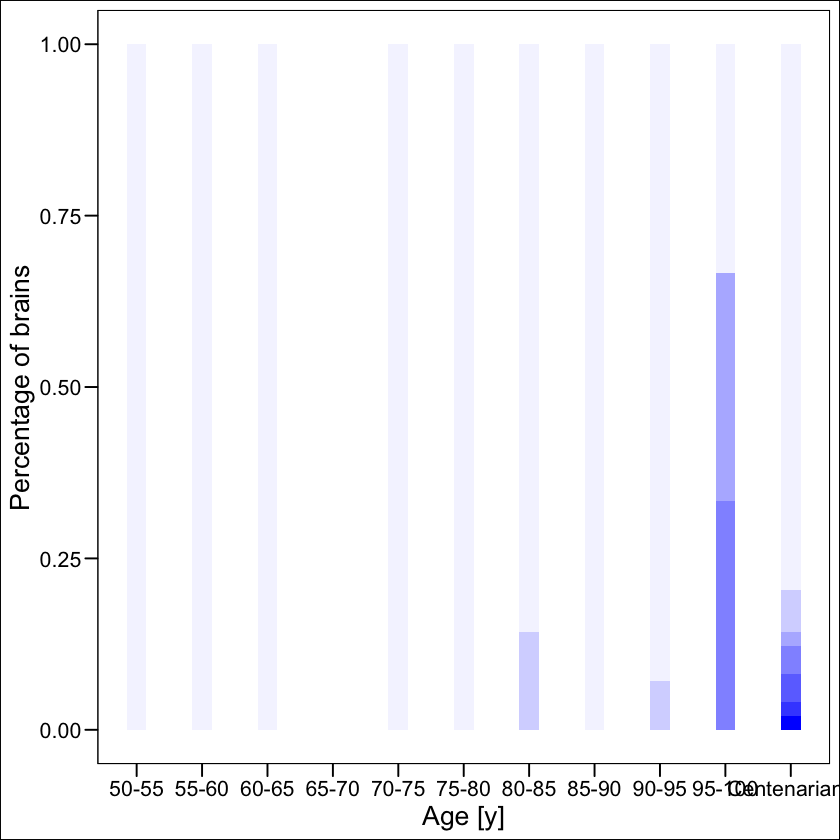

In [1047]:
plot_ND

In [1048]:
plot_AD <- ggplot(subset(age_path_perc_df, GROUP != "ND"), aes(alpha=Var1, y=Freq, x=age)) + 
    geom_bar(position="fill", stat="identity", width=0.3, fill = "Red") +
    xlab("Age [y]") +
    ylab("Percentage of brains") + 
    scale_alpha_manual(name="Amyloid stage", breaks = c(0, 1, 2, 3, 4, 5, 6), 
                       values = c(0.05, 0.2, 0.35, 0.5, 0.65, 0.8, 1),
                       #labels = c(#"None",
                       #           #"Slight", 
                       #           #"Moderate", 
                       #           #"Severe"
                       #           "0",
                       #           "1", 
                       #           "2", 
                       #           "3",
                       #           "4",
                       #           "5",
                       #           "6"
                       #)
                       )+

    theme_base() +
    theme(legend.position = "none")

Warning message:
“Removed 7 rows containing missing values (geom_bar).”

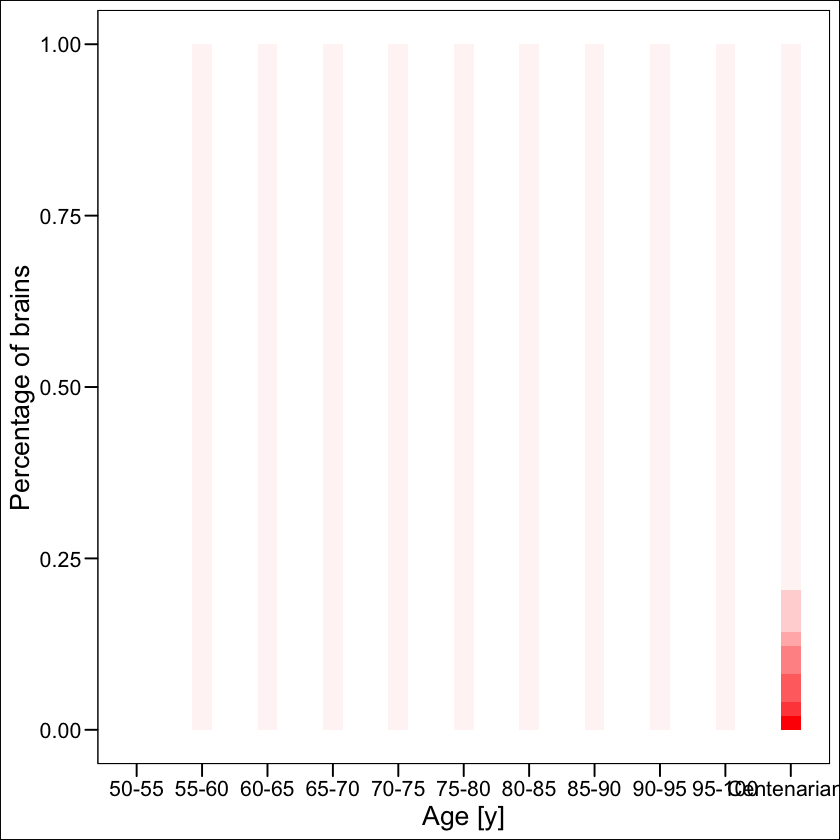

In [1049]:
plot_AD

In [1050]:
save_plot("100_plus_plots/Other neuropathologies/1.Age_Lewy_body_NDCEN.pdf", 
          plot_ND, base_height = 4, base_width = 12)
save_plot("100_plus_plots/Other neuropathologies/1.Age_Lewy_body_ADCEN.pdf", 
          plot_AD, base_height = 4, base_width = 12)

Warning message:
“Removed 7 rows containing missing values (geom_bar).”Warning message:
“Removed 7 rows containing missing values (geom_bar).”

In [1051]:
pathology_data_inpaper

nbb,GROUP,sex,age,pmd,ph,Brain weight [g],APOE,CDR,Reisberg,⋯,Atherosclerosis (0=none/1=slight/2=moderate/3=severe),Amyloid (A from ABC score Hyman 2012),Braak&Braak stage NFTs,Neuritic plaques (CERAD),Lewy bodies (Braak staging),Hip sclerosis (absent=0; present=1),Infarcts (absent=0; present=1),CAA (Thal Stage),"TDP-43 Centenarians (Nelson et al., 2023)",TDP-43 positivity in the amygdala (0=none; 1=little; 2=many)
<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
777,ND,f,72,0.30555555555555552,NA,1205,NA,NA,NA,⋯,NA,0,0,0,0,0,0,NA,NA,NA
797,ND,m,59,0.33333333333333331,NA,1322,NA,NA,NA,⋯,NA,1,1,0,0,0,0,NA,NA,NA
859,ND,m,72,0.48958333333333331,NA,1355,NA,NA,NA,⋯,NA,0,NA,NA,0,0,1,NA,NA,NA
880,ND,m,77,0.47569444444444442,NA,1260,NA,NA,NA,⋯,NA,0,1,NA,0,0,0,NA,NA,NA
889,ND,f,79,0.22569444444444445,NA,1285,NA,NA,NA,⋯,NA,2,2,1,0,0,0,NA,NA,NA
1993-014,AD,f,70,02:25,6.5,861,E3/E3,nd,7,⋯,1,3,5,2,0,0,1,NA,NA,NA
1995-066,AD,f,84,04:40,6.28,1020,E3/E4,nd,7,⋯,NA,3,5,3,0,0,0,NA,NA,NA
1996-035,AD,f,90,04:11,6.62,950,E3/E3,nd,7,⋯,3,3,4,3,0,0,1,1,NA,NA
1997-015,AD,f,85,03:10,6.9,1044,E3/E4,nd,7,⋯,1,3,5,2,0,0,0,1,NA,2


In [1052]:
load(file = "100_plus_project/Metadata/proteomics_pca_top2dim.Rdata")
pca_plot

,nbb,x,y,GROUP
,<fct>,<dbl>,<dbl>,<fct>
intensity_20190325_121_S16_020_CHC_011,2016-020,-35.089769,4.8477107,CHC
intensity_20190325_125_S16_044_CHC_007,2016-044,-21.092192,3.7238308,CHC
intensity_20190325_127_S16_094_CHC_004,2016-094,9.252990,15.1824654,CHC
intensity_20190325_16_04_037_AD_008,2004-011,1.373858,12.6555248,AD
intensity_20190325_183_S10_292_AD_010,2010-101,46.656608,-38.2178075,AD
intensity_20190325_194_S02_055_ND_005,2002-024,-55.460688,-16.9230073,ND
intensity_20190325_31_01_184_AD_006,2001-081,37.804544,-18.9322022,AD
intensity_20190325_57_S97_235_AD_003,1997-091,38.194726,-7.9545154,AD
intensity_20190325_77_S11_072_ND_012,2011-072,-22.289181,10.4374861,ND


In [1053]:
order_list <- NULL
for(i in pca_plot$nbb){
    order_list <- c(order_list, which(pathology_data_inpaper$nbb == i))
}

In [1054]:
pathology_data_inpaper <- pathology_data_inpaper[order_list,]

In [1055]:
sum(pathology_data_inpaper$nbb == pca_plot$nbb)
sum(rownames(pca_plot) == colnames(protein_intensity_combat))

[1] 190

[1] 190

In [1056]:
pathology_data_inpaper

nbb,GROUP,sex,age,pmd,ph,Brain weight [g],APOE,CDR,Reisberg,⋯,Atherosclerosis (0=none/1=slight/2=moderate/3=severe),Amyloid (A from ABC score Hyman 2012),Braak&Braak stage NFTs,Neuritic plaques (CERAD),Lewy bodies (Braak staging),Hip sclerosis (absent=0; present=1),Infarcts (absent=0; present=1),CAA (Thal Stage),"TDP-43 Centenarians (Nelson et al., 2023)",TDP-43 positivity in the amygdala (0=none; 1=little; 2=many)
<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2016-020,CEN,f,102,06:10,6.47,955,E2/E3,NA,NA,⋯,2,1,2,0,0,0,1,0,0,0
2016-044,CEN,f,102,05:17,6.6,1015,E3/E3,NA,NA,⋯,1,3,3,1,0,0,0,1,1,1
2016-094,CEN,f,104,07:55,6.19,1045,E3/E3,NA,NA,⋯,2,1,3,0,6,0,1,1,2,1
2004-011,AD,f,84,05:55,6.42,1017,E3/E3,nd,6,⋯,0,3,5,1,0,0,0,1,NA,NA
2010-101,AD,m,64,04:35,6.35,1233,E2/E3,nd,7,⋯,1,3,6,0,0,0,0,1,NA,0
2002-024,ND,f,75,05:30,7.20,1153,E2/E4,nd,-1,⋯,1,3,1,0,0,0,0,1,NA,NA
2001-081,AD,f,93,05:05,6.27,1010,E3/E3,nd,7,⋯,3,3,5,0,0,0,1,2,NA,1
1997-091,AD,f,85,02:00,7.25,1000,E3/E4,nd,7,⋯,1,3,5,1,0,0,0,1,NA,NA
2011-072,ND,f,76,07:15,6.87,1072,E3/E3,nd,1,⋯,0,0,2,0,0,0,0,0,NA,NA


In [1057]:
protein_intensity_combat

,intensity_20190325_121_S16_020_CHC_011,intensity_20190325_125_S16_044_CHC_007,intensity_20190325_127_S16_094_CHC_004,intensity_20190325_16_04_037_AD_008,intensity_20190325_183_S10_292_AD_010,intensity_20190325_194_S02_055_ND_005,intensity_20190325_31_01_184_AD_006,intensity_20190325_57_S97_235_AD_003,intensity_20190325_77_S11_072_ND_012,intensity_20190325_79_S07_308_ND_009,⋯,intensity_20190507_21_01_032_AD_221,intensity_20190507_27_00_204_AD_211,intensity_20190507_29_S99_240_AD_219,intensity_20190507_30_S05_040_AD_209,intensity_20190507_63_04_027_AD_217,intensity_20190507_72_S99_219_AD_213,intensity_20190606_106_NABCA14_08_ND_RERUN,intensity_20190606_140_2017_027_CHC_RERUN,intensity_20190606_20_S00_166_AD_RERUN,intensity_20190606_9_S93_025_AD_RERUN
SLC12A2,9.687328,9.853346,9.678499,9.523232,10.197734,10.377290,9.704502,9.731868,9.511865,10.060545,⋯,9.770805,9.760676,9.546179,9.375455,9.812898,9.899122,10.162025,9.928215,9.724227,9.829637
CASKIN1,10.318229,9.909565,9.792107,9.730668,9.296508,10.335115,9.366887,9.678025,9.932444,9.806767,⋯,9.675534,9.399476,9.217342,10.027737,9.579749,9.714810,9.769584,9.555116,9.988298,9.592697
GNG2,8.794196,7.769292,8.567891,7.934384,7.811156,8.000504,7.375781,7.845749,8.394810,8.181498,⋯,7.524240,7.193323,7.257155,7.889708,8.019423,7.682225,7.531847,7.675368,7.770395,7.957669
CARNS1,5.214262,6.485597,6.855188,4.821086,8.051261,6.893927,6.873825,7.038296,5.513223,6.432737,⋯,5.769251,7.364321,5.596068,5.102724,7.062244,5.900433,6.647769,7.206671,6.828433,7.024894
FH,11.643708,12.097567,12.256208,11.918251,11.792772,11.152025,12.033793,11.978551,11.926281,11.944412,⋯,12.201281,11.889508,12.171888,11.864323,11.846824,12.126557,12.088388,12.029530,11.802065,12.131518
EFHD2,9.034089,9.297398,10.654375,8.877509,9.123183,8.519058,9.685513,10.174081,9.261185,9.452498,⋯,9.422225,9.651485,9.802933,8.756487,9.284933,10.136638,10.074767,10.295362,9.370446,10.121049
PCLO,11.115460,10.003896,9.890327,10.712352,10.446448,11.380954,10.843997,10.734064,11.107606,10.948346,⋯,11.208206,10.827227,11.125134,11.425576,9.693250,11.170335,11.135240,11.050726,10.807953,11.042033
HSPA1A;HSPA1B,12.787109,12.664968,12.984629,12.746847,13.413799,12.407370,13.286137,13.385587,12.505640,12.852240,⋯,12.718970,13.309147,13.146747,12.868970,12.554777,13.264569,12.989698,12.891123,12.927105,13.284698
STIP1,9.835297,9.582039,11.174088,9.906800,10.200622,8.515325,10.632213,11.048683,9.395102,10.369342,⋯,10.335390,10.396579,10.259065,10.346729,9.986738,10.676498,10.610376,10.306991,10.103285,10.857284
CTNND1,9.316259,8.737714,8.791159,8.610681,8.826200,9.332157,8.885534,8.710376,8.516840,8.813721,⋯,8.804078,9.072845,8.531603,8.915607,8.868354,8.771155,9.038941,8.827413,8.916982,8.799422


In [1058]:
colnames(pathology_data_inpaper)

[1] "nbb"                                                         
 [2] "GROUP"                                                       
 [3] "sex"                                                         
 [4] "age"                                                         
 [5] "pmd"                                                         
 [6] "ph"                                                          
 [7] "Brain weight [g]"                                            
 [8] "APOE"                                                        
 [9] "CDR"                                                         
[10] "Reisberg"                                                    
[11] "Cause of death"                                              
[12] "chronic diseases"                                            
[13] "ABC (Hyman 2012)"                                            
[14] "Atrophy (0=none/1=slight/2=moderate/3=severe)"               
[15] "Atherosclerosis (0=none/1=slight/2=moderate/3=severe)"       
[16] "Amyloid (A from ABC score Hyman 2012)"                       
[17] "Braak&Braak stage\r\nNFTs"                                   
[18] "Neuritic plaques (CERAD)"                                    
[19] "Lewy bodies (Braak staging)"                                 
[20] "Hip sclerosis (absent=0; present=1)"                         
[21] "Infarcts (absent=0; present=1)"                              
[22] "CAA\r\n (Thal Stage)"                                        
[23] "TDP-43 Centenarians (Nelson et al., 2023)"                   
[24] "TDP-43 positivity in the amygdala (0=none; 1=little; 2=many)"

In [1082]:
varianc_exp_df <- pathology_data_inpaper[c("nbb", "GROUP", 'sex','age','pmd','Brain weight [g]','APOE',
                                           'Amyloid (A from ABC score Hyman 2012)',
                                           'Braak&Braak stage\r\nNFTs', 'Neuritic plaques (CERAD)',
                                           'Lewy bodies (Braak staging)',
                                           'Atrophy (0=none/1=slight/2=moderate/3=severe)',
                                           'Hip sclerosis (absent=0; present=1)',
                                           'Infarcts (absent=0; present=1)','CAA\r\n (Thal Stage)',
                                           'TDP-43 positivity in the amygdala (0=none; 1=little; 2=many)',
                                           'Atherosclerosis (0=none/1=slight/2=moderate/3=severe)')]

In [1083]:
colnames(varianc_exp_df) <- c("nbb", "GROUP", 'sex','age','pmd','Brain_weight','APOE', "Amyloid", "Braak", "CERAD", "Lewy",
                              "Atrophy", "Hip", "Infarcts", "CAA", "TDP43", "Atherosclerosis")

In [1093]:
table(varianc_exp_df$GROUP, varianc_exp_df$APOE, useNA = "ifany")

     
      E2/E2 E2/E3 E2/E4 E3/E3 E3/E4 E4/E4 <NA>
  AD      0     8     2    32    45     0    1
  CEN     1    10     2    30     4     0    2
  ND      2     4     1    21     7     1   17

In [1084]:
convert_time_2_numeric <- function(pmd){
    if (is.na(pmd))
        return (NA)
    else
        return (as.numeric(str_sub(pmd, start=1, end=2))+as.numeric(str_sub(pmd, 4))/60)
}

varianc_exp_df$pmd_numeric <- apply(varianc_exp_df["pmd"], 1, convert_time_2_numeric)

In [1090]:
varianc_exp_df$APOE_OR <- NA

varianc_exp_df[which((varianc_exp_df$APOE == "E2/E2")|(varianc_exp_df$APOE == "E2/E3")|(varianc_exp_df$APOE == "E3/E2")),]$APOE_OR <- 0.6
varianc_exp_df[which((varianc_exp_df$APOE == "E2/E4")|(varianc_exp_df$APOE == "E4/E2")),]$APOE_OR <- 2.6
varianc_exp_df[which(varianc_exp_df$APOE == "E3/E3"),]$APOE_OR <- 1
varianc_exp_df[which((varianc_exp_df$APOE == "E3/E4")|(varianc_exp_df$APOE == "E4/E3")),]$APOE_OR <- 3.2
varianc_exp_df[which(varianc_exp_df$APOE == "E4/E4"),]$APOE_OR <- 14.9

In [1091]:
summary(varianc_exp_df[c("nbb", "GROUP", 'sex','age','pmd_numeric','Brain_weight','APOE_OR', "Amyloid", "Braak", "CERAD", "Lewy",
                              "Hip", "Infarcts", "CAA")])

     nbb               GROUP               sex                 age       
 Length:190         Length:190         Length:190         Min.   : 50.0  
 Class :character   Class :character   Class :character   1st Qu.: 78.0  
 Mode  :character   Mode  :character   Mode  :character   Median : 89.0  
                                                          Mean   : 86.8  
                                                          3rd Qu.:100.0  
                                                          Max.   :111.0  
                                                                         
  pmd_numeric         Brain_weight     APOE_OR          Amyloid     
 Min.   :2.000e+00   Min.   : 738   Min.   : 0.600   Min.   :0.000  
 1st Qu.:5.000e+00   1st Qu.:1002   1st Qu.: 1.000   1st Qu.:1.000  
 Median :6.000e+00   Median :1074   Median : 1.000   Median :3.000  
 Mean   :2.049e+12   Mean   :1086   Mean   : 1.795   Mean   :2.112  
 3rd Qu.:7.000e+00   3rd Qu.:1174   3rd Qu.: 3.200   3rd Qu.:3.

In [1147]:
complete_case <- which(complete.cases(varianc_exp_df[c("nbb", "GROUP", #'sex', 
                                                       'age',
                                                       #'pmd_numeric','Brain_weight',
                                                       "Amyloid", #'APOE_OR',
                                                       "Braak", "CERAD", "Lewy",
                                                       "Hip", "Infarcts", "CAA",#,
                                                       "Atrophy", "TDP43", "Atherosclerosis"
                                                      )]))

In [1148]:
length(complete_case)

[1] 111

In [1149]:
varianc_exp_df[complete_case, ]

nbb,GROUP,sex,age,pmd,Brain_weight,APOE,Amyloid,Braak,CERAD,Lewy,Atrophy,Hip,Infarcts,CAA,TDP43,Atherosclerosis,pmd_numeric,APOE_OR
<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2016-020,CEN,f,102,06:10,955,E2/E3,1,2,0,0,1,0,1,0,0,2,6.166667,0.6
2016-044,CEN,f,102,05:17,1015,E3/E3,3,3,1,0,1,0,0,1,1,1,5.283333,1.0
2016-094,CEN,f,104,07:55,1045,E3/E3,1,3,0,6,2,0,1,1,1,2,7.916667,1.0
2010-101,AD,m,64,04:35,1233,E2/E3,3,6,0,0,0,0,0,1,0,1,4.583333,0.6
2001-081,AD,f,93,05:05,1010,E3/E3,3,5,0,0,2,0,1,2,1,3,5.083333,1.0
2016-032,CEN,m,101,05:30,1060,E3/E4,1,3,0,0,1,0,0,1,0,1,5.500000,3.2
2017-014,CEN,f,108,06:10,940,E3/E3,1,2,0,0,1,0,1,2,0,3,6.166667,1.0
2017-129,CEN,f,107,05:40,1130,E3/E3,1,3,0,0,0,0,1,0,0,1,5.666667,1.0
2009-022,ND,f,77,02:55,1111,E3/E3,2,1,0,0,0,0,0,1,0,1,2.916667,1.0


In [1150]:
table(varianc_exp_df[complete_case, ]$GROUP)


 AD CEN  ND 
 49  49  13 

In [1151]:
form <- ~ (1|sex) + age + pmd_numeric + Brain_weight + APOE_OR + Amyloid + Braak + CERAD + Lewy + Hip + Infarcts + CAA + Atrophy + TDP43 + Atherosclerosis

In [1119]:
varPart <- fitExtractVarPartModel((protein_intensity_combat[ ,complete_case]), 
                                  form, varianc_exp_df[complete_case, ])

vp <- sortCols(varPart)

Dividing work into 100 chunks...

Total:28 s


In [1120]:
p_1 <- plotVarPart(vp, col = c('#F8766D', '#CD9600', '#7CAE00', '#00BE67', '#00BFC4', '#00A9FF', '#C77CFF', '#A65628', '#F781BF',
                               '#FF61CC', '#C1272D', '#0000A7', '#EECC16', '#008176', '#B3B3B3', "grey85"))

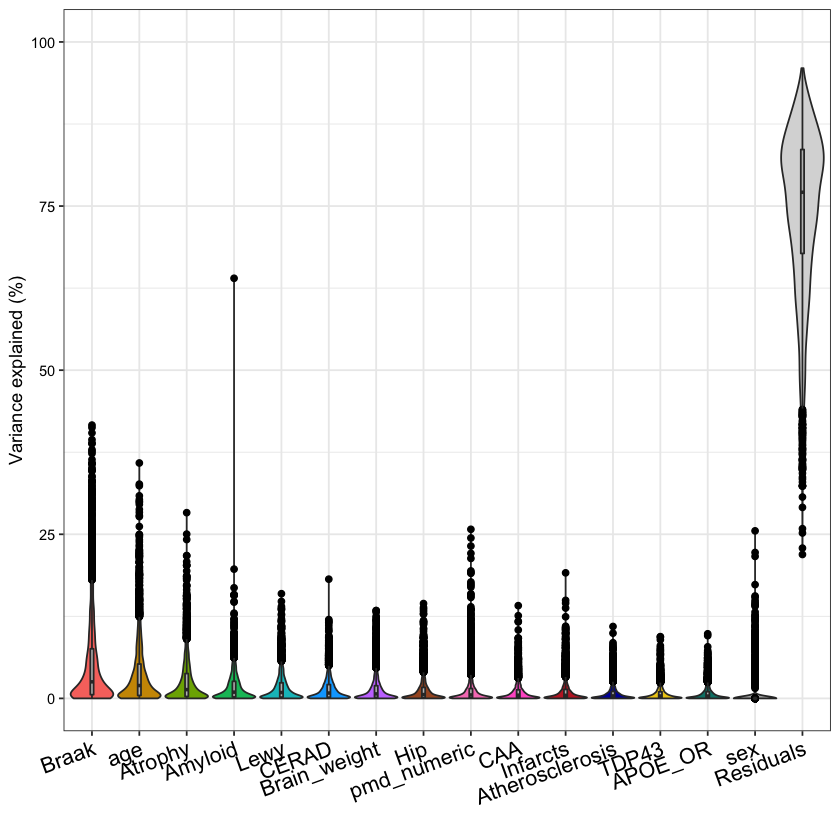

In [1121]:
p_1

In [1122]:
save_plot("100_plus_plots/Other neuropathologies/Variance_explained_by_age_and_neuropathologies_in108_complete_cases(48AD 8ND 47CEN).pdf", 
          p_1, base_height = 5, base_width = 10)

In [1153]:
form <- ~ age + Atrophy + TDP43 + Atherosclerosis +#pmd_numeric + Brain_weight + #APOE_OR + 
Amyloid + Braak + CERAD + Lewy + Hip + Infarcts + CAA# + Atrophy + TDP43 + Atherosclerosis

In [1154]:
C = canCorPairs(form, varianc_exp_df[complete_case,])

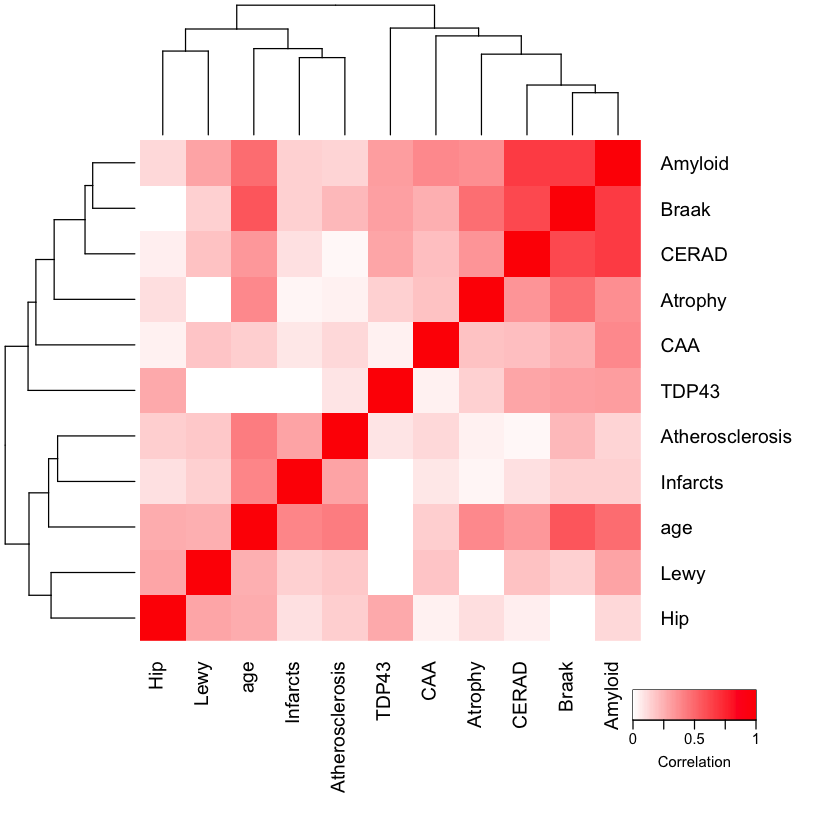

In [1155]:
plotCorrMatrix(C, margins = c(10, 10), key.xlab = "Correlation")

In [1156]:
pdf("100_plus_plots/Other neuropathologies/correlation_between_age_and_neuropathologies-small_samle_size-in111_complete_cases(49AD 13ND 49CEN).pdf", width=8, height=8)
plotCorrMatrix(C, margins = c(9, 9), key.xlab = "Correlation")
dev.off()

pdf 
  2

In [214]:
#load(file = "100_plus_project/Metadata/proteomics_pca_top2dim.Rdata")

In [215]:
#sum(pca_plot$nbb %in% pathology_df$nbb)

[1] 190

In [216]:
#pca_plot$TDP43 <- sapply(pca_plot$nbb, function(x){
#    return(pathology_df[which(pathology_df$nbb == x), ]$Hip)
#})

Warning message:
“Unknown or uninitialised column: `Hip`.”Warning message:
“Unknown or uninitialised column: `Hip`.”Warning message:
“Unknown or uninitialised column: `Hip`.”Warning message:
“Unknown or uninitialised column: `Hip`.”Warning message:
“Unknown or uninitialised column: `Hip`.”Warning message:
“Unknown or uninitialised column: `Hip`.”Warning message:
“Unknown or uninitialised column: `Hip`.”Warning message:
“Unknown or uninitialised column: `Hip`.”Warning message:
“Unknown or uninitialised column: `Hip`.”Warning message:
“Unknown or uninitialised column: `Hip`.”Warning message:
“Unknown or uninitialised column: `Hip`.”Warning message:
“Unknown or uninitialised column: `Hip`.”Warning message:
“Unknown or uninitialised column: `Hip`.”Warning message:
“Unknown or uninitialised column: `Hip`.”Warning message:
“Unknown or uninitialised column: `Hip`.”Warning message:
“Unknown or uninitialised column: `Hip`.”Warning message:
“Unknown or uninitialised column: `Hip`.”Warning messag

“Unknown or uninitialised column: `Hip`.”Warning message:
“Unknown or uninitialised column: `Hip`.”Warning message:
“Unknown or uninitialised column: `Hip`.”Warning message:
“Unknown or uninitialised column: `Hip`.”Warning message:
“Unknown or uninitialised column: `Hip`.”Warning message:
“Unknown or uninitialised column: `Hip`.”Warning message:
“Unknown or uninitialised column: `Hip`.”Warning message:
“Unknown or uninitialised column: `Hip`.”Warning message:
“Unknown or uninitialised column: `Hip`.”Warning message:
“Unknown or uninitialised column: `Hip`.”Warning message:
“Unknown or uninitialised column: `Hip`.”Warning message:
“Unknown or uninitialised column: `Hip`.”Warning message:
“Unknown or uninitialised column: `Hip`.”Warning message:
“Unknown or uninitialised column: `Hip`.”Warning message:
“Unknown or uninitialised column: `Hip`.”Warning message:
“Unknown or uninitialised column: `Hip`.”Warning message:
“Unknown or uninitialised column: `Hip`.”Warning message:
“Unknown or un

In [127]:
pca_plot$TDP43_c <- as.factor(pca_plot$TDP43)

In [128]:
pca_plot

,nbb,x,y,GROUP,TDP43,TDP43_c
,<fct>,<dbl>,<dbl>,<fct>,<dbl>,<fct>
intensity_20190325_121_S16_020_CHC_011,2016-020,-35.089769,4.8477107,CHC,NA,NA
intensity_20190325_125_S16_044_CHC_007,2016-044,-21.092192,3.7238308,CHC,0,0
intensity_20190325_127_S16_094_CHC_004,2016-094,9.252990,15.1824654,CHC,0,0
intensity_20190325_16_04_037_AD_008,2004-011,1.373858,12.6555248,AD,NA,NA
intensity_20190325_183_S10_292_AD_010,2010-101,46.656608,-38.2178075,AD,1,1
intensity_20190325_194_S02_055_ND_005,2002-024,-55.460688,-16.9230073,ND,0,0
intensity_20190325_31_01_184_AD_006,2001-081,37.804544,-18.9322022,AD,2,2
intensity_20190325_57_S97_235_AD_003,1997-091,38.194726,-7.9545154,AD,NA,NA
intensity_20190325_77_S11_072_ND_012,2011-072,-22.289181,10.4374861,ND,0,0


In [129]:
table(pca_plot$TDP43_c, useNA = "ifany")


   0    1    2 <NA> 
  88   29   21   52 

In [130]:
0=none; 1=little; 2=many

ERROR: Error in 0 = none: invalid (do_set) left-hand side to assignment


ERROR: Error in 1 = little: invalid (do_set) left-hand side to assignment


ERROR: Error in 2 = many: invalid (do_set) left-hand side to assignment


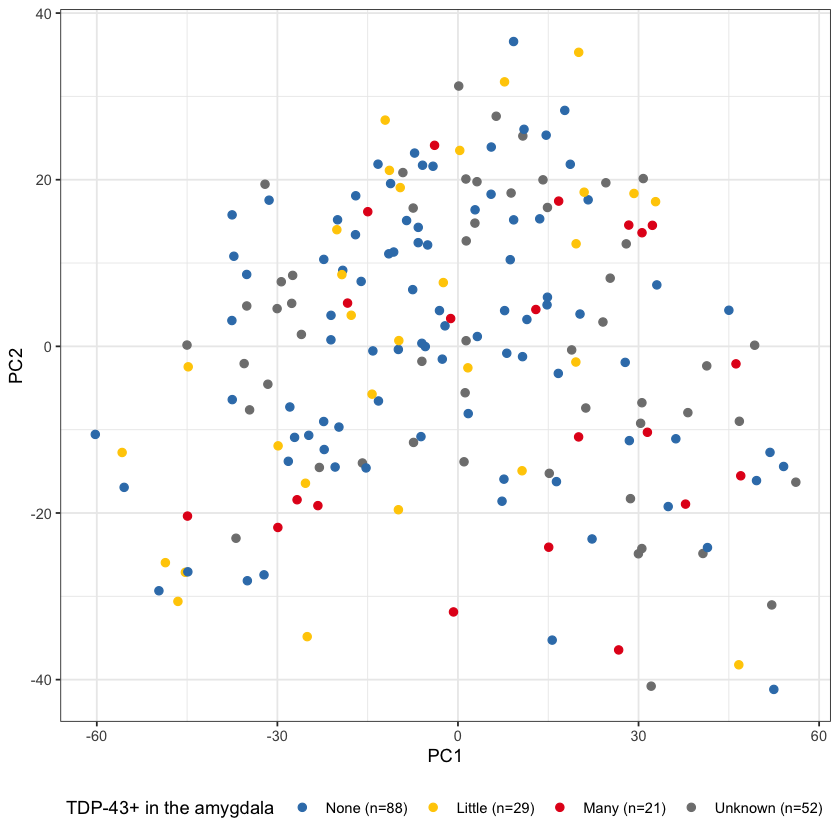

In [133]:
PCA_plot <- ggplot(pca_plot) + geom_point(aes(x=x, y=y, color=TDP43_c#, shape=Comorbidity
                                 ), size=2) +
    xlab("PC1") + 
    ylab("PC2") +
    
    scale_color_manual(name="TDP-43+ in the amygdala", breaks = c("0", "1", "2", NA), #c("0", "1", "2", "3", "4", "5", "6", NA)c("0", "1", "2", "3", "4", "5", "6", NA), #, 
                       values = c('#377EB8', "#FFCC00", '#E41A1C',  "grey"),
                       labels = c("None (n=88)",
                                  "Little (n=29)",
                                  "Many (n=21)",
                                  "Unknown (n=52)")
                       )+
    
    theme(axis.title.x = element_text(size = 15),
          axis.title.y = element_text(size = 15),
          axis.text.x = element_text(size = 15),
          axis.text.y = element_text(size = 15),
          legend.text=element_text(size=13))+
    labs(color='Comorbidity') + #, shape = "Comorbidity") 
    theme_bw() +
    theme(legend.position = "bottom")
PCA_plot

In [134]:
save_plot("100_plus_plots/PCA_plot_for_TDP-43_in190samples.pdf", 
          PCA_plot, base_height = 7, base_width = 7)

In [656]:
colnames(varianc_exp_df)

[1] "nbb"             "GROUP"           "Age"             "Amyloid"        
 [5] "Braak"           "CERAD"           "Lewy"            "Atrophy"        
 [9] "Hip"             "Infarcts"        "CAA"             "TDP43"          
[13] "Atherosclerosis"

In [728]:
table(varianc_exp_df[-which(is.na(varianc_exp_df$Braak)), ]$GROUP)


 AD CEN  ND 
 88  49  50 

In [729]:
dim(varianc_exp_df[-which(is.na(varianc_exp_df$Braak)), ])

[1] 187  13

In [730]:
table(varianc_exp_df[-which(is.na(varianc_exp_df$Braak)), ]$Braak) 


 0  1  2  3  4  5  6 
 4 22 23 32 34 47 25 

In [731]:
pca <- prcomp(t(protein_intensity_combat[, -which(is.na(varianc_exp_df$Braak))]), center = T, scale = T)
pca_plot <- data.frame(x = pca$x[,1], y = pca$x[,2], 
                       TDP43 = as.factor(varianc_exp_df[-which(is.na(varianc_exp_df$Braak)), ]$Braak))

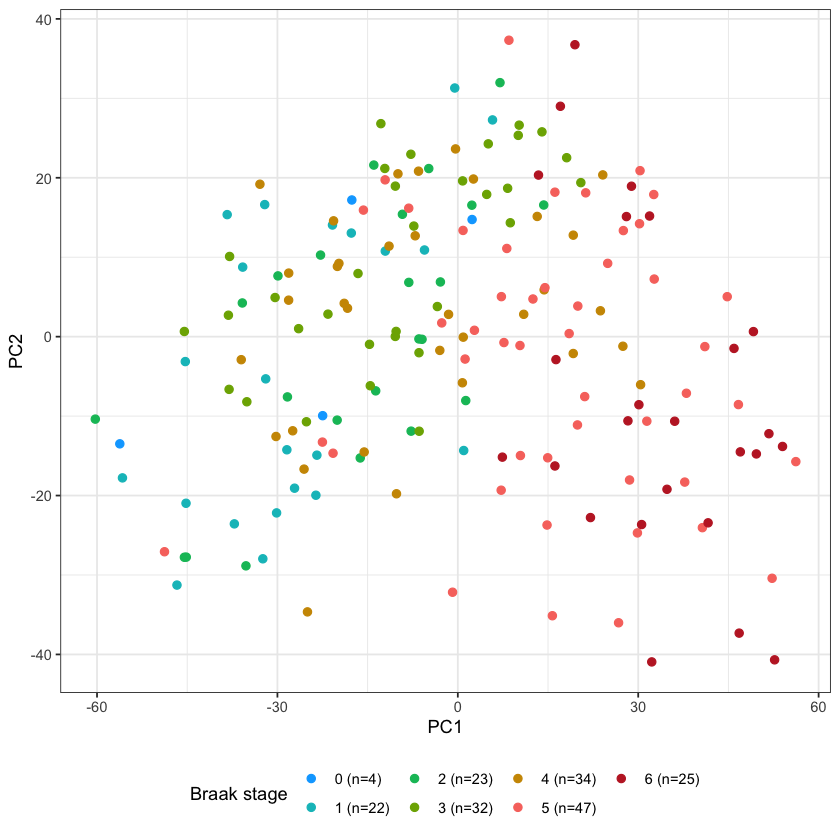

In [734]:
PCA_plot <- ggplot(pca_plot) + geom_point(aes(x=x, y=y, color=TDP43#, shape=Comorbidity
                                 ), size=2) +
    xlab("PC1") + 
    ylab("PC2") +
    
    scale_color_manual(name="Braak stage", breaks = c("0", "1", "2", "3", "4", "5", "6"),
                       values = c('#00A9FF', '#00BFC4', '#00BE67', '#7CAE00', '#CD9600', '#F8766D','#C1272D'),
                       labels = c("0 (n=4)",
                                  "1 (n=22)", 
                                  "2 (n=23)", 
                                  "3 (n=32)",
                                  "4 (n=34)", 
                                  "5 (n=47)", 
                                  "6 (n=25)"
                           #"Absent (n=174)",
                                  #"Present (n=14)"#,
                                  #"2 (n=2)",
                                  #"3 (n=3)",
                                  #"4 (n=2)",
                                  #"5 (n=1)", 
                                  #"6 (n=1)"
                                 )
                       )+
    
    theme(axis.title.x = element_text(size = 15),
          axis.title.y = element_text(size = 15),
          axis.text.x = element_text(size = 15),
          axis.text.y = element_text(size = 15),
          legend.text=element_text(size=13))+
    #labs(color='Comorbidity') + #, shape = "Comorbidity") 
    theme_bw() +
    theme(legend.position = "bottom")
PCA_plot

In [735]:
save_plot("100_plus_plots/Other neuropathologies/PCA_plot_for_Braak_stage_in188samples_with_knownvalue.pdf", 
          PCA_plot, base_height = 7, base_width = 7)

In [17]:
insert_minor <- function(major_labs, n_minor) {labs <- 
                              c( sapply( major_labs, function(x) c(x, rep("", 4) ) ) )
                              labs[1:(length(labs)-n_minor)]}

Warning message:
“Removed 12 rows containing missing values (geom_bar).”

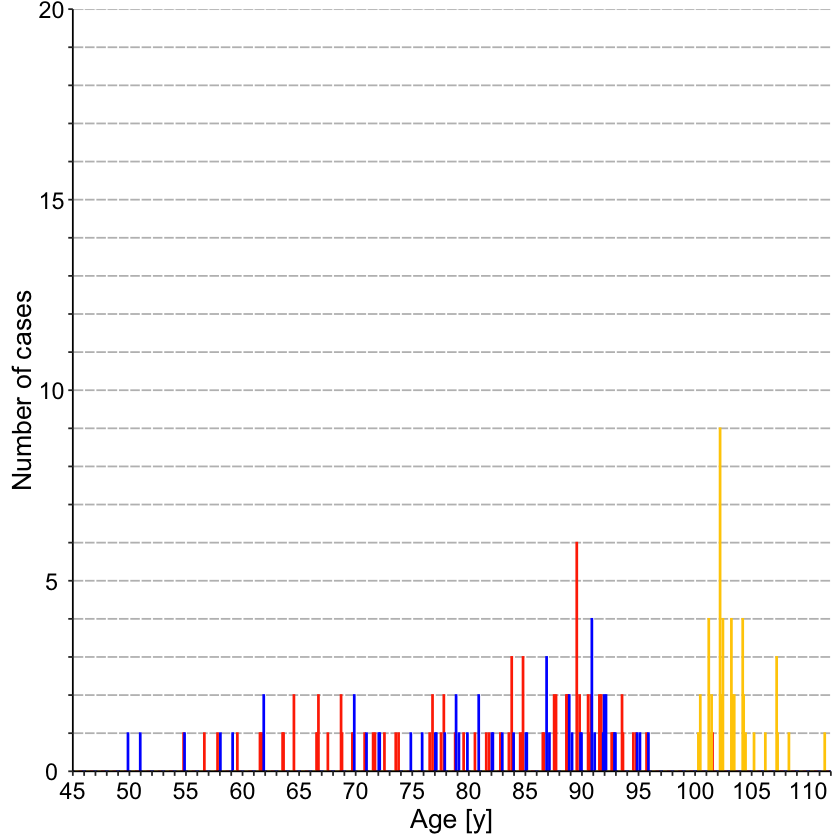

In [22]:
#jpeg(file="100_plus_plots/age_distribution_3groups.jpg", width=600*5, height=300*5, res=72*5)
p <- ggplot(pathology_df, aes(x=age, color=GROUP, fill = as.factor(TDP43))) + 
    geom_histogram(binwidth=1, alpha=0.9, position="dodge") +
    xlab("Age [y]") + ylab("Number of cases") +
    scale_x_continuous(limits = c(45, 112), breaks=seq(45, 115, 1), 
                       labels = insert_minor(seq(45, 115, 5), 4 ),
                       expand = c(0, 0)) +
    scale_y_continuous(limits = c(0, 20), breaks=seq(0, 20, 1), 
                       labels=insert_minor(seq(0, 20, 5), 4 ),
                       expand = c(0, 0)) +
    scale_color_manual(name="Group", breaks = c("AD", "ND", "CHC"), 
                       values = c(color_AD, color_ND, color_CHC_M),
                       labels = c("ND",
                                  "AD", 
                                  "CHC")
                       )+
    theme(#plot.background = element_rect(),    # Background of the entire plot
          panel.background = element_rect(fill = "white"),   # Background of plotting area
          #panel.border = element_rect(),       # Border around plotting area.
                                               # fill argument should be NA
  
          #panel.grid = element_line(),         # All grid lines
          #panel.grid.major = element_line(),   # Major grid lines
          #panel.grid.minor = element_line(),   # Minor grid lines
        
          #plot.margin = ggplot2::margin(0.1, 0.5, 0.5, 0.5, "cm"),
          legend.position = "none",
  
          panel.grid.major.x = element_line(), # Vertical major grid lines
          panel.grid.major.y = element_line(size = 0.5, linetype = 'solid',
                                            color = "gray"), # Horizontal major grid lines
          #panel.grid.minor.x = element_line(), # Vertical minor grid lines
          #panel.grid.minor.y = element_line(size = 0.5, linetype = 'solid',
          #                      color = "gray"),  # Vertical major grid lines
        
          plot.title = element_text(face = "bold", colour = "black", 
                                    size = font_size+font_size_add*2#, hjust = -0.08
                                   ),
        
          axis.title.x = element_text(color = "black", size = font_size+font_size_add * 2,
                                      vjust = 0.5, hjust = 0.5),
          axis.title.y = element_text(color = "black", size = font_size+font_size_add * 2,
                                      vjust = 0.5, hjust = 0.5),

          axis.text.x = element_text(size = font_size+font_size_add, color = "black", 
                                     vjust = 0.5, hjust = 0.5),
          axis.text.y = element_text(size = font_size+font_size_add, color = "black",
                                     vjust = 0.5, hjust = 0.5),
          
          axis.line = element_line(size = 0.5, linetype = "solid",
                                   colour = "black")
         )
p